## Задание 2

"Сырые" лайки и просмотры могут быть познавательными сами по себе, но качество поста можно оценить не только по ним. Полезной может оказаться такая метрика как CTR - в данном случае это отношение количества лайков ко всем просмотрам данного поста. Также важную информацию может дать время существования поста - насколько продолжительное время конкретный пост смотрят и лайкают.   

Посчитайте CTR и время существования для каждого из постов (от первого просмотра поста).    

Затем:
- Нарисуйте их распределения
- Постройте корреляционную матрицу между ними, просмотрами и лайками
- Визуализируйте все эти взаимосвязи в виде диаграмм рассеяния

Какие суждения об этих величинах верны? Суждение может быть одно, а может быть несколько.

- [ ] Между количеством лайков и временем существования поста связь линейная
- [ ] Сильнее всего коррелируют CTR и время существования поста
- [ ] По сравнению с просмотрами и лайками CTR менее асимметричен
- [ ] В среднем посты "живут" пять дней

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from read_db import Getch

In [13]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [5]:
query = """
SELECT
    post_id,
    sum(action = 'view') views,
    sum(action = 'like') likes,
    likes / views as ctr,
    dateDiff('day', min(time), max(time)) + 1 lifetime
FROM simulator_20220420.feed_actions
GROUP BY post_id
"""

In [6]:
data = Getch(query).df

In [7]:
data.head()

,post_id,views,likes,ctr,lifetime
0,610,10727,2271,0.211709,5
1,4660,1637,192,0.117288,2
2,4742,11,1,0.090909,1
3,720,6120,1089,0.177941,4
4,948,9846,2051,0.208308,4


In [11]:
data.drop(['post_id'], axis=1).corr(method='pearson')

,views,likes,ctr,lifetime
views,1.000000,0.990347,0.795002,0.835273
likes,0.990347,1.000000,0.746809,0.791010
ctr,0.795002,0.746809,1.000000,0.878119
lifetime,0.835273,0.791010,0.878119,1.000000


### Между количеством лайков и временем существования поста связь линейная
Коэффициент корреляции между лайками и временем существования равен 0.791 – связь не очень сильная

### Сильнее всего коррелируют CTR и время существования поста
Коэффициент корреляции между CTR и временем существования равен 0.878. Это не максимум.

### В среднем посты "живут" пять дней

In [9]:
# среднее время жизни в днях
data['lifetime'].mean()

2.863730084348641

### По сравнению с просмотрами и лайками CTR менее асимметричен

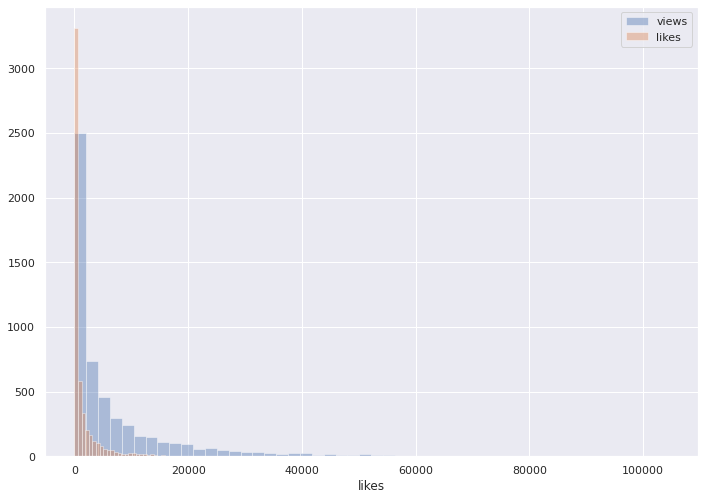

In [16]:
sns.distplot(data['views'], kde = False, label='views')
sns.distplot(data['likes'], kde = False, label='likes')
plt.legend()

<AxesSubplot:xlabel='ctr'>

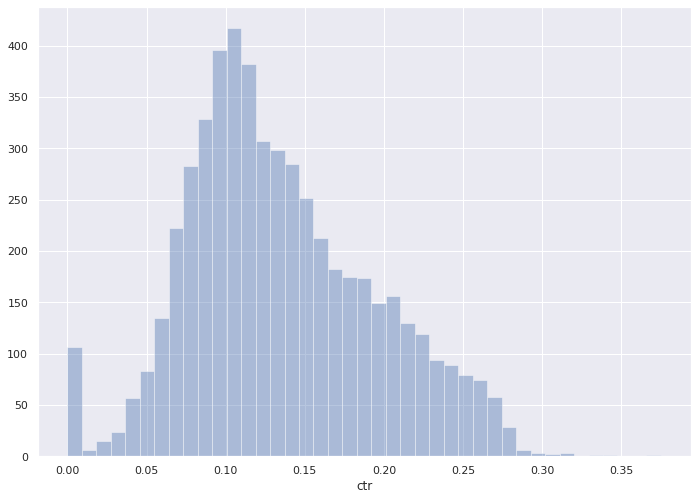

In [17]:
sns.distplot(data['ctr'], kde = False, label='ctr')

Итого:
- [ ] Между количеством лайков и временем существования поста связь линейная
- [ ] Сильнее всего коррелируют CTR и время существования поста
- [x] По сравнению с просмотрами и лайками CTR менее асимметричен
- [ ] В среднем посты "живут" пять дней